# Supervised - Student Scores - Machine Learning

## Import Necessary Libraries

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Import the dataset

In [167]:
# Read the dataset using pandas
data = pd.read_csv('student_scores.csv')

In [168]:
# This displays the top 7 rows of the data
data.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


## Exploratory Data Analysis

In [169]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [170]:
# This describes the basic stat behind the dataset used
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

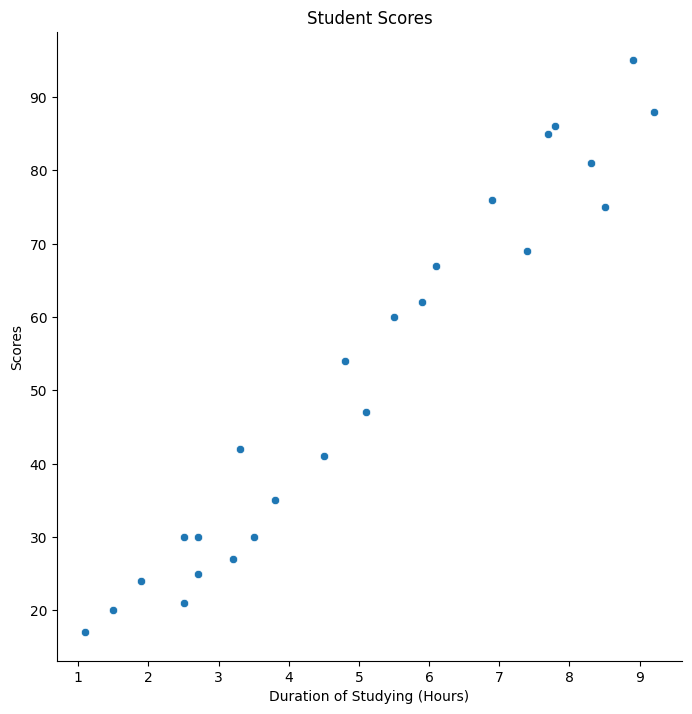

In [171]:
# These Plots help to explain the values and how they are scattered
plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Duration of Studying (Hours)')
plt.ylabel('Scores')
plt.title('Student Scores')
plt.show()

### Feature Engineering

1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis
4. Encoding categorical : change string (categorical) into numerical -> in this dataset, there are no categorical data.

### Investigate of Feature Engineering

In [172]:
df = data.copy()

In [173]:
#Check Duplicated Data
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


There is no duplicated data.

In [174]:
#Check missing value
df.isnull().sum()

,0
Hours,0
Scores,0


There is no missing value

### Check for Outliers

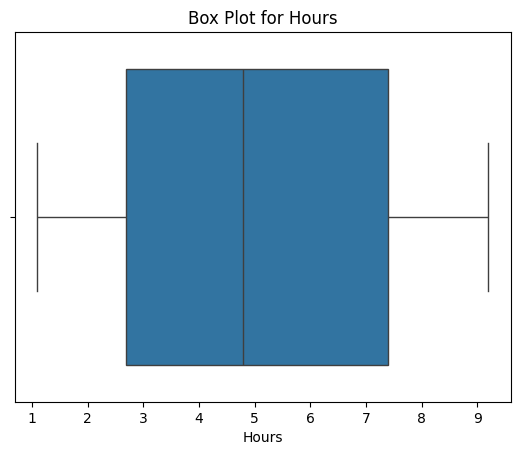

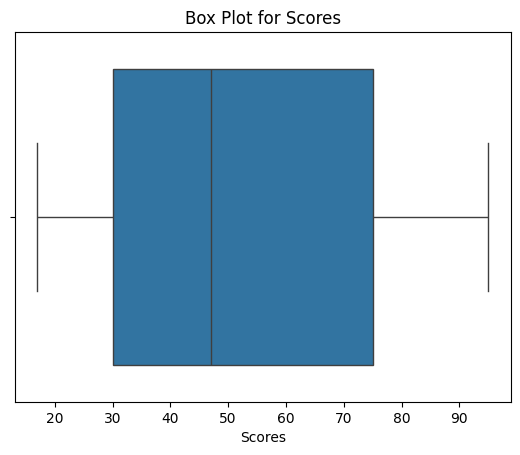

In [175]:
# Box plot for 'Hours'
sns.boxplot(x="Hours", data=df)
plt.title('Box Plot for Hours')
plt.show()

# Box plot for 'Scores'
sns.boxplot(x="Scores", data=df)
plt.title('Box Plot for Scores')
plt.show()

### There's no outlier value
### There are no problems in investigate Feature Engineering, next we are doing machine learning modelling and splitting data into X_train, X_test -> Predictor, y_train, y_test -> target variables. If there are problems in investigate feature engineering then doing splitting data and process feature engineering handling.

## Prepare the data to make a machine learning model

### Split the Data into Features and Target
We need to separate the data into features (X) and target variable (y)

In [176]:
# Define the features (Hours) and target (Scores)
X = df[['Hours']]  # Independent variable (feature)
y = df['Scores']   # Dependent variable (target)

In [177]:
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [178]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


### Split the Data into Training and Testing Sets
We'll split the data into training and testing sets to evaluate the model's performance

In [179]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression Model

### Create and Train the Linear Regression Model
We will use LinearRegression from scikit-learn to create and fit the model

In [180]:
# Create the Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)


LinearRegression()

### Make Predictions
Now, use the trained model to make predictions on the test data:

In [181]:
# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

### Evaluate the Model
Evaluate the model using metrics like Mean Squared Error (MSE) and R-squared (R^2)

In [182]:
# Calculate Mean Squared Error and R-squared
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}")


Mean Squared Error: 18.943211722315272
R-squared: 0.9678055545167994


In [183]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.826892353899737
Coefficient of the line Linear Regression: [9.68207815]


Then, it is said to form a line with result in Linear Regression

**y = 2.82 + 9.68x**

with x is the value of duration of studying

### Visualize the Results
Visualize the linear regression line with training data and testing data

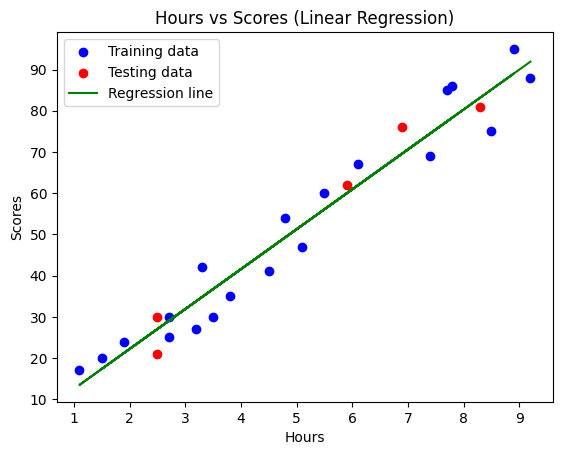

In [184]:
# Plot the training data points
plt.scatter(X_train, y_train, color='blue', label='Training data')
# Plot the testing data points
plt.scatter(X_test, y_test, color='red', label='Testing data')
# Plot the regression line
plt.plot(X_train, lr_model.predict(X_train), color='green', label='Regression line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores (Linear Regression)')
plt.legend()
plt.show()


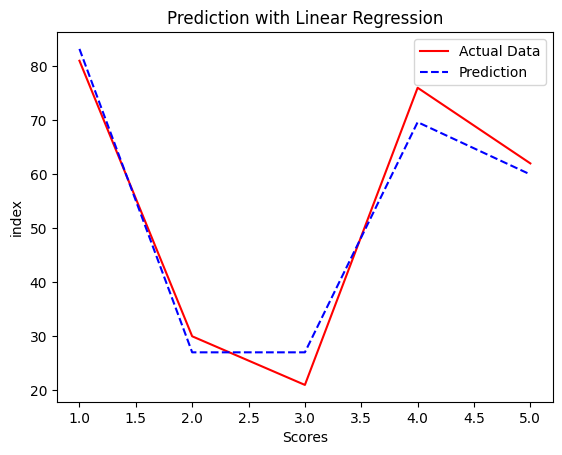

In [185]:
# Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_lr,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

## Decision Tree Model

### Train the Decision Tree Model
Use the DecisionTreeRegressor from scikit-learn to create and train the model.

In [186]:
# Create the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

### Make Predictions
Now, use the trained model to make predictions on the test data.

In [187]:
# Predict on the test data
y_pred_dt = dt_model.predict(X_test)


### Evaluate the Model
Evaluate the performance of the model using metrics like Mean Squared Error (MSE) and R-squared (R2) score.

In [188]:
# Calculate Mean Squared Error
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate R-squared Score
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Mean Squared Error: {mse_dt}')
print(f'R-squared Score: {r2_dt}')


Mean Squared Error: 31.7
R-squared Score: 0.9461250849762066


### Plot the Predictions
Plot the actual vs predicted values to see how well the model fits.

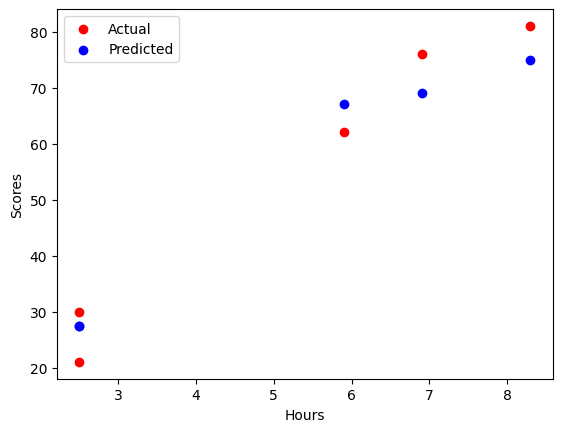

In [189]:
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred_dt, color='blue', label='Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()


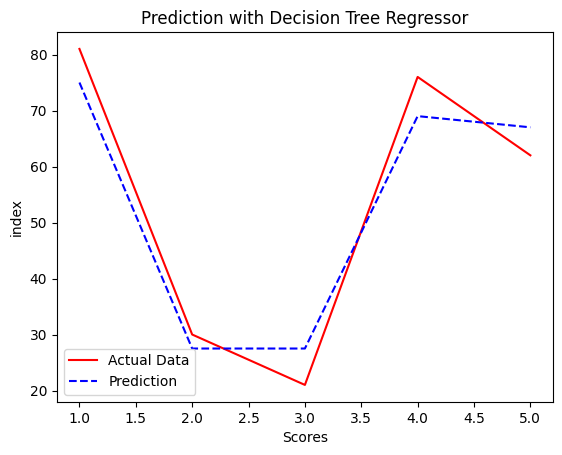

In [190]:
# Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Decision Tree Regressor')
plt.legend()
plt.show()

## Random Forest Model

### Train the Random Forest Model
Instantiate and train the RandomForestRegressor.

In [191]:
# Create the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Make Predictions
Use the trained model to make predictions on the test data.

In [192]:
# Predict on the test data
y_pred_rf = rf_model.predict(X_test)


### Evaluate the Model
Evaluate the performance of the Random Forest model using Mean Squared Error (MSE) and R-squared (R²) score.

In [193]:
# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate R-squared Score
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared Score: {r2_rf}')


Mean Squared Error: 13.045153611111104
R-squared Score: 0.9778294466160586


### Visualize the Predictions
You can visualize the actual vs predicted values to see how well the Random Forest model performs

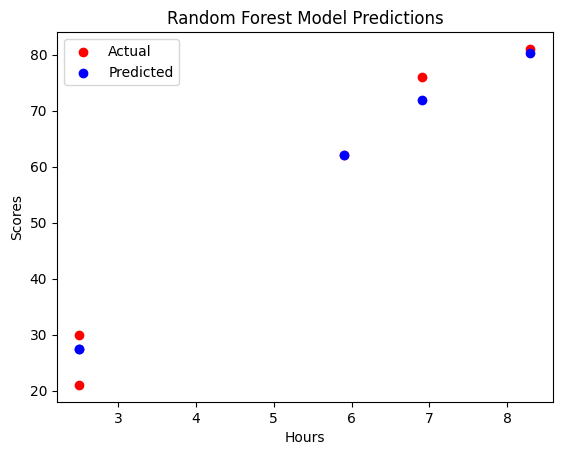

In [194]:
# Plot actual vs predicted values
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred_rf, color='blue', label='Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Random Forest Model Predictions')
plt.legend()
plt.show()


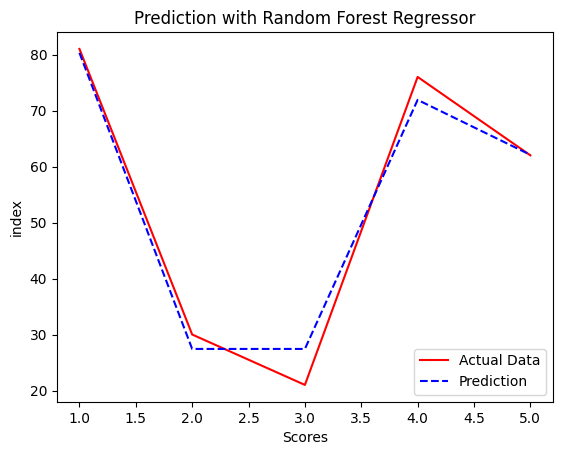

In [195]:
# Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_rf,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Random Forest Regressor')
plt.legend()
plt.show()

## Comparison Between Linear Regression, Decision Tree, and Random Forest Models

### Summary of Results
| Model | Mean Squared Error (MSE) | R-squared (R²) |
|:------|:-------------------------|:---------------|
| Linear Regression | 18.94 | 0.9678  |
| Decision Tree     | 31.70 | 0.9461  |
| Random Forest     | 13.05 | 0.9778  |


### Conclusions
1.   Performance Evaluation:
*   Random Forest outperformed both Linear Regression and Decision Tree models with the lowest Mean Squared Error (MSE) of 13.05 and the highest R-squared score of 0.9778. This indicates that it has the best fit for the data and captures the underlying relationships effectively.
*   Linear Regression also performed well, with an MSE of 18.94 and an R-squared score of 0.9678, suggesting a strong linear relationship with the data. However, it was slightly less accurate than the Random Forest model.
*   Decision Tree had the highest MSE of 31.70 and the lowest R-squared score of 0.9461, indicating that it did not generalize as well as the other two models. It is more prone to overfitting, which can be a concern if the data is noisy or contains outliers.


2.   Model Robustness:
*   The Random Forest model is more robust to variations in the dataset due to its ensemble nature, which combines multiple decision trees and averages their predictions. This results in better generalization and performance on unseen data compared to a single Decision Tree.
*   The Linear Regression model, while effective for linear relationships, may not capture more complex patterns that exist in the data as well as the Random Forest.


3.  Interpretability:
*   While Random Forest offers better predictive performance, it is less interpretable than the Linear Regression model. If model interpretability is a priority for decision-making, Linear Regression may still be a favorable option despite slightly lower predictive accuracy.
*   Decision Trees can provide some level of interpretability, but in this case, their performance did not justify their use.





### Visualize the Predictions
You can visualize the actual vs predicted values for each model to understand how well they fit the data.

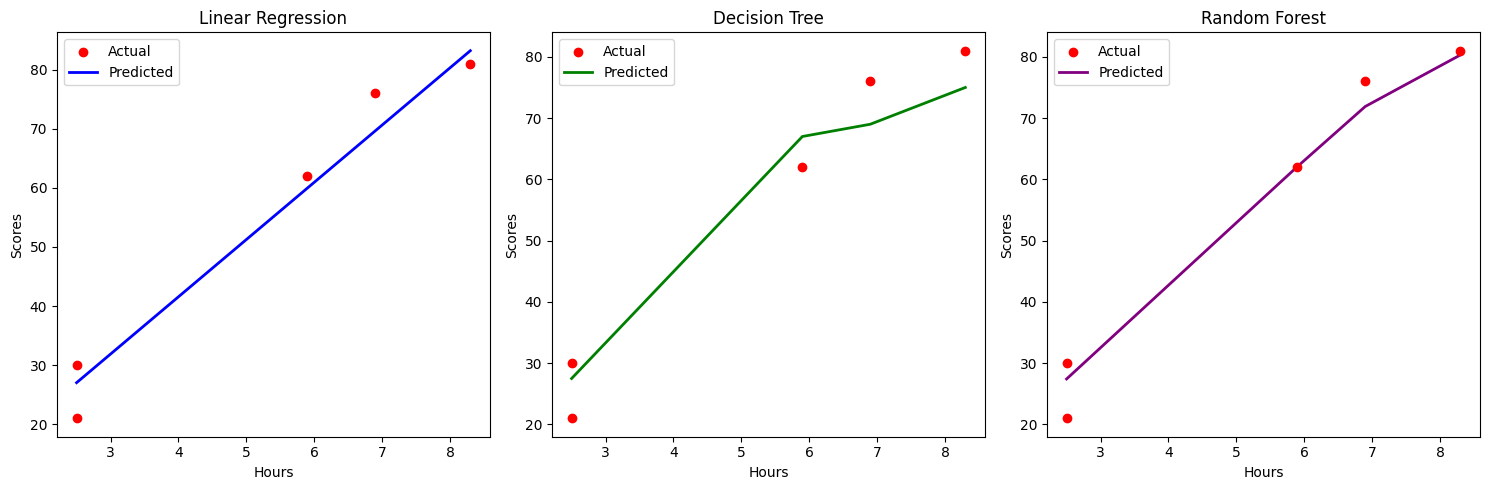

In [196]:
# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(X_test, y_test, color='red', label='Actual', zorder=5)
# Sort values for a smooth line plot
sorted_indices = np.argsort(X_test.values.flatten())
plt.plot(X_test.values[sorted_indices], y_pred_lr[sorted_indices], color='blue', label='Predicted', linewidth=2)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linear Regression')
plt.legend()

# Decision Tree
plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, color='red', label='Actual', zorder=5)
# Sort values for a smooth line plot
sorted_indices = np.argsort(X_test.values.flatten())
plt.plot(X_test.values[sorted_indices], y_pred_dt[sorted_indices], color='green', label='Predicted', linewidth=2)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Decision Tree')
plt.legend()

# Random Forest
plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test, color='red', label='Actual', zorder=5)
# Sort values for a smooth line plot
sorted_indices = np.argsort(X_test.values.flatten())
plt.plot(X_test.values[sorted_indices], y_pred_rf[sorted_indices], color='purple', label='Predicted', linewidth=2)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Random Forest')
plt.legend()

plt.tight_layout()
plt.show()


## Use the Model for Prediction
We can use the trained model to predict the score for a specific number of study hours

In [197]:
# Function to predict scores using Linear Regression
def predict_score_lr(hours):
    """
    Predicts the score based on the input hours using the trained Linear Regression model.

    Args:
    hours (float or list of floats): Number of hours studied.

    Returns:
    float or list of floats: Predicted scores.
    """
    if isinstance(hours, (int, float)):
        hours = np.array([[hours]])
    else:
        hours = np.array(hours).reshape(-1, 1)

    predicted_scores = lr_model.predict(hours)
    return predicted_scores

# Function to predict scores using Decision Tree
def predict_score_dt(hours):
    """
    Predicts the score based on the input hours using the trained Decision Tree model.

    Args:
    hours (float or list of floats): Number of hours studied.

    Returns:
    float or list of floats: Predicted scores.
    """
    if isinstance(hours, (int, float)):
        hours = np.array([[hours]])
    else:
        hours = np.array(hours).reshape(-1, 1)

    predicted_scores = dt_model.predict(hours)
    return predicted_scores

# Function to predict scores using Random Forest
def predict_score_rf(hours):
    """
    Predicts the score based on the input hours using the trained Random Forest model.

    Args:
    hours (float or list of floats): Number of hours studied.

    Returns:
    float or list of floats: Predicted scores.
    """
    if isinstance(hours, (int, float)):
        hours = np.array([[hours]])
    else:
        hours = np.array(hours).reshape(-1, 1)

    predicted_scores = rf_model.predict(hours)
    return predicted_scores

In [198]:
# Example usage of the prediction functions
hours_studied = 6.5  # Example: Predict score for 6.5 hours of study

# Linear Regression prediction
predicted_score_lr = predict_score_lr(hours_studied)
print(f'Linear Regression - Predicted Score for {hours_studied} hours of study: {predicted_score_lr}')

# Decision Tree prediction
predicted_score_dt = predict_score_dt(hours_studied)
print(f'Decision Tree - Predicted Score for {hours_studied} hours of study: {predicted_score_dt}')

# Random Forest prediction
predicted_score_rf = predict_score_rf(hours_studied)
print(f'Random Forest - Predicted Score for {hours_studied} hours of study: {predicted_score_rf}')

Linear Regression - Predicted Score for 6.5 hours of study: [65.76040036]
Decision Tree - Predicted Score for 6.5 hours of study: [67.]
Random Forest - Predicted Score for 6.5 hours of study: [67.89]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [199]:
# Predict scores for multiple hours using all models
hours_studied_list = [3, 5, 7]

# Linear Regression predictions
predicted_scores_lr_list = predict_score_lr(hours_studied_list)
print(f'Linear Regression - Predicted Scores for {hours_studied_list}: {predicted_scores_lr_list}')

# Decision Tree predictions
predicted_scores_dt_list = predict_score_dt(hours_studied_list)
print(f'Decision Tree - Predicted Scores for {hours_studied_list}: {predicted_scores_dt_list}')

# Random Forest predictions
predicted_scores_rf_list = predict_score_rf(hours_studied_list)
print(f'Random Forest - Predicted Scores for {hours_studied_list}: {predicted_scores_rf_list}')

Linear Regression - Predicted Scores for [3, 5, 7]: [31.87312682 51.23728313 70.60143944]
Decision Tree - Predicted Scores for [3, 5, 7]: [27. 47. 69.]
Random Forest - Predicted Scores for [3, 5, 7]: [27.435 48.58  72.95 ]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
